# QHO Wavefunctions and Probability Densities
This notebook animates the wavefunctions and probability densities.

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from qho import QuantumHarmonicOscillator
from math import ceil

## Calculating <sup>1</sup>H<sup>35</sup>Cl
The <sup>1</sup>H<sup>35</sup>Cl molecule has the following bond force constant (k) and reduced mass (m<sub>r</sub>):
$$ k = 481 N/m $$
$$ m_r = 1.627 \times 10^{-27} kg $$

### Set the values in variables

In [2]:
k = 481.  # Bond force constant
mass_r = 1.627e-27  # Reduced mass
x_min = -0.55e-10  # Minimum distance to plot in meters
x_max = 0.55e-10  # Maximum distance to plot in meters
n_frames = 100  # Number of frames in animation
n_points = n_frames * 2  # Number of points to to calculate between the min and max.

qho = QuantumHarmonicOscillator(k=k, mass_r=mass_r)
vs = range(qho.max_v() + 1)
wavefunctions = [qho.wavefunction_across_range(v, x_min, x_max, n_points) for v in vs]
prob_densities = [qho.prob_density(v, x_min, x_max, n_points) for v in vs]

## Plot wavefunction/prob density pairs
### Settings for animation and colors

In [3]:
dpi = 100
width = 1080 / dpi
height = 1920 * 2 / 3 / dpi

# Soft colors
# bgcolor = "#1E1E1E"
# line_color = "#73FBD3"
# axis_color = "#01BAEF"
# annotation_color = "#FFFFFF"
# heading_text_color = "#FC7753"

# Bright colors
bgcolor = "#000000"
line_color_1 = "#DDFFF7"
axis_color = "#B96AC9"
line_color_2 = "#EF8354"
heading_text_color = "#FFFFFF"

### Make the animations

v=0, frame=0
v=0, frame=1
v=0, frame=2
v=0, frame=3
v=0, frame=4
v=0, frame=5
v=0, frame=6
v=0, frame=7
v=0, frame=8
v=0, frame=9
v=0, frame=10
v=0, frame=11
v=0, frame=12
v=0, frame=13
v=0, frame=14
v=0, frame=15
v=0, frame=16
v=0, frame=17
v=0, frame=18
v=0, frame=19
v=0, frame=20
v=0, frame=21
v=0, frame=22
v=0, frame=23
v=0, frame=24
v=0, frame=25
v=0, frame=26
v=0, frame=27
v=0, frame=28
v=0, frame=29
v=0, frame=30
v=0, frame=31
v=0, frame=32
v=0, frame=33
v=0, frame=34
v=0, frame=35
v=0, frame=36
v=0, frame=37
v=0, frame=38
v=0, frame=39
v=0, frame=40
v=0, frame=41
v=0, frame=42
v=0, frame=43
v=0, frame=44
v=0, frame=45
v=0, frame=46
v=0, frame=47
v=0, frame=48
v=0, frame=49
v=0, frame=50
v=0, frame=51
v=0, frame=52
v=0, frame=53
v=0, frame=54
v=0, frame=55
v=0, frame=56
v=0, frame=57
v=0, frame=58
v=0, frame=59
v=0, frame=60
v=0, frame=61
v=0, frame=62
v=0, frame=63
v=0, frame=64
v=0, frame=65
v=0, frame=66
v=0, frame=67
v=0, frame=68
v=0, frame=69
v=0, frame=70
v=0, frame=71
v=

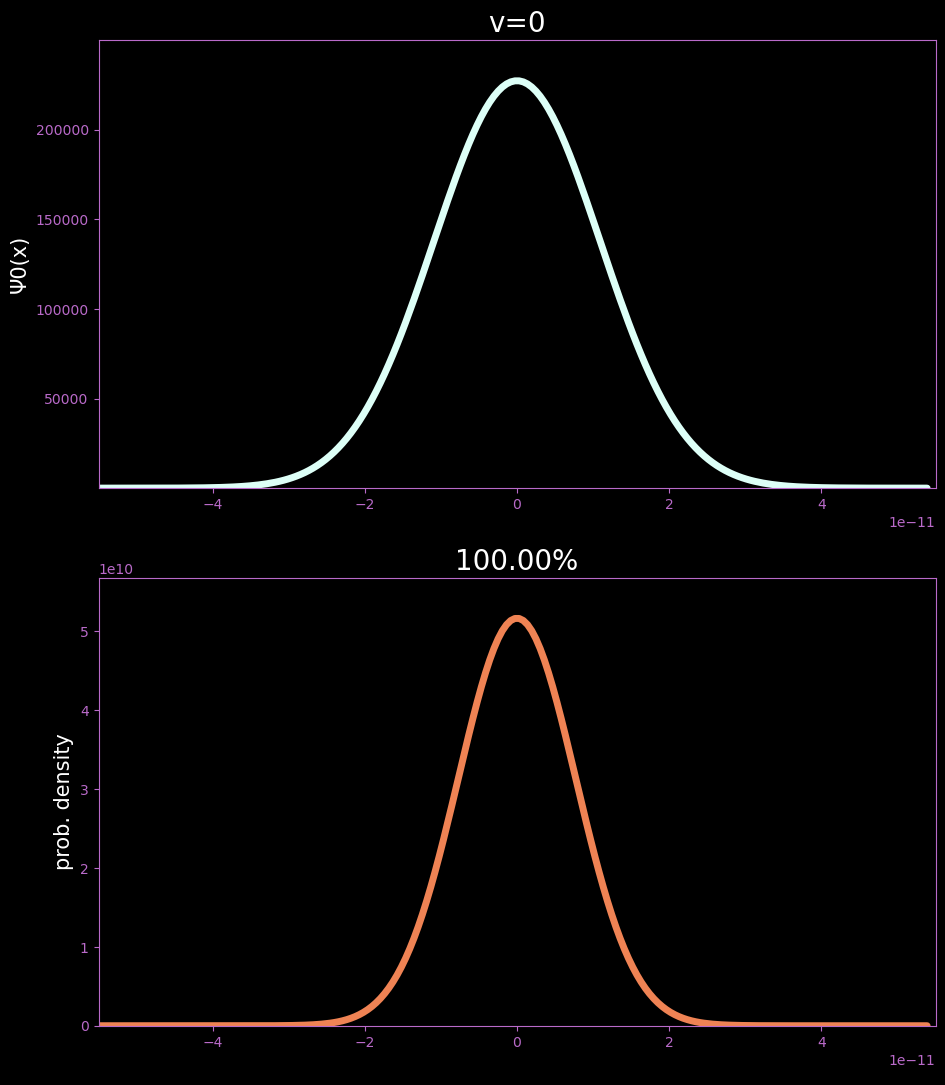

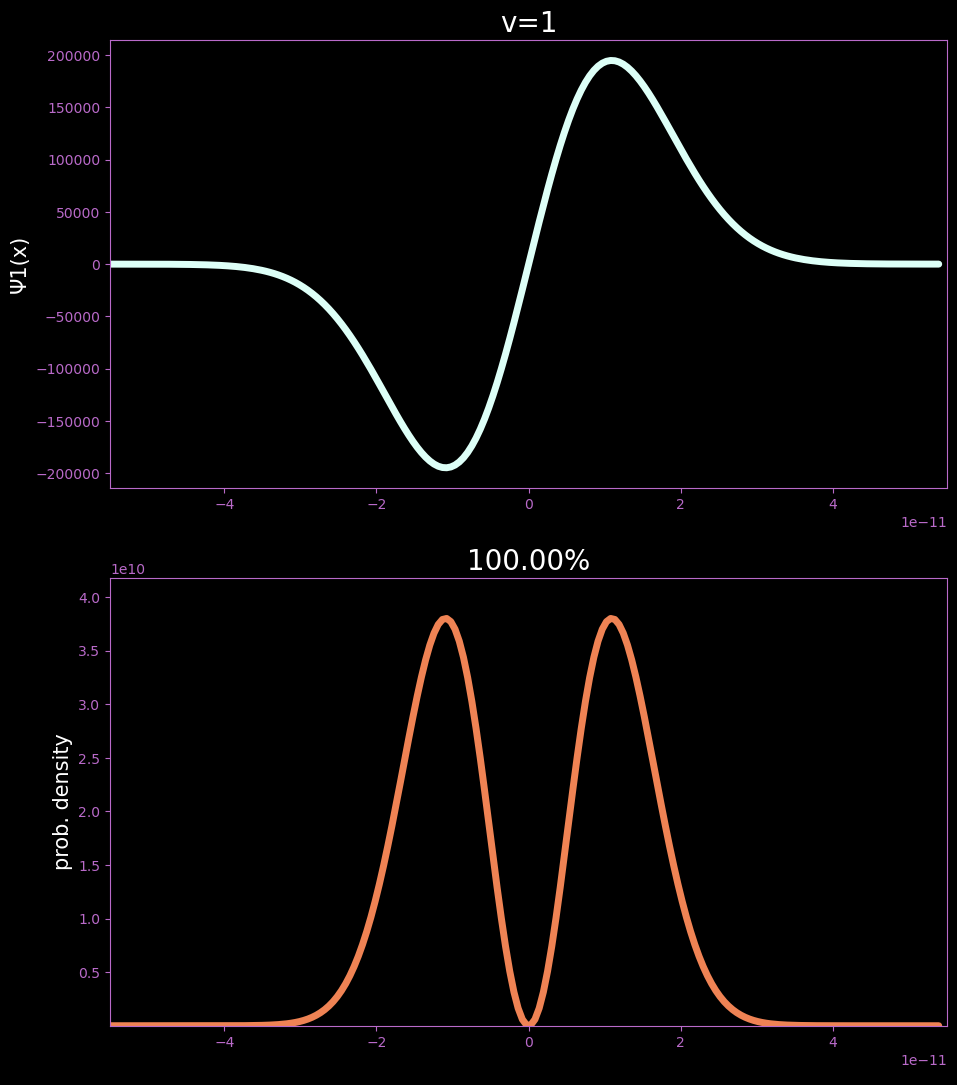

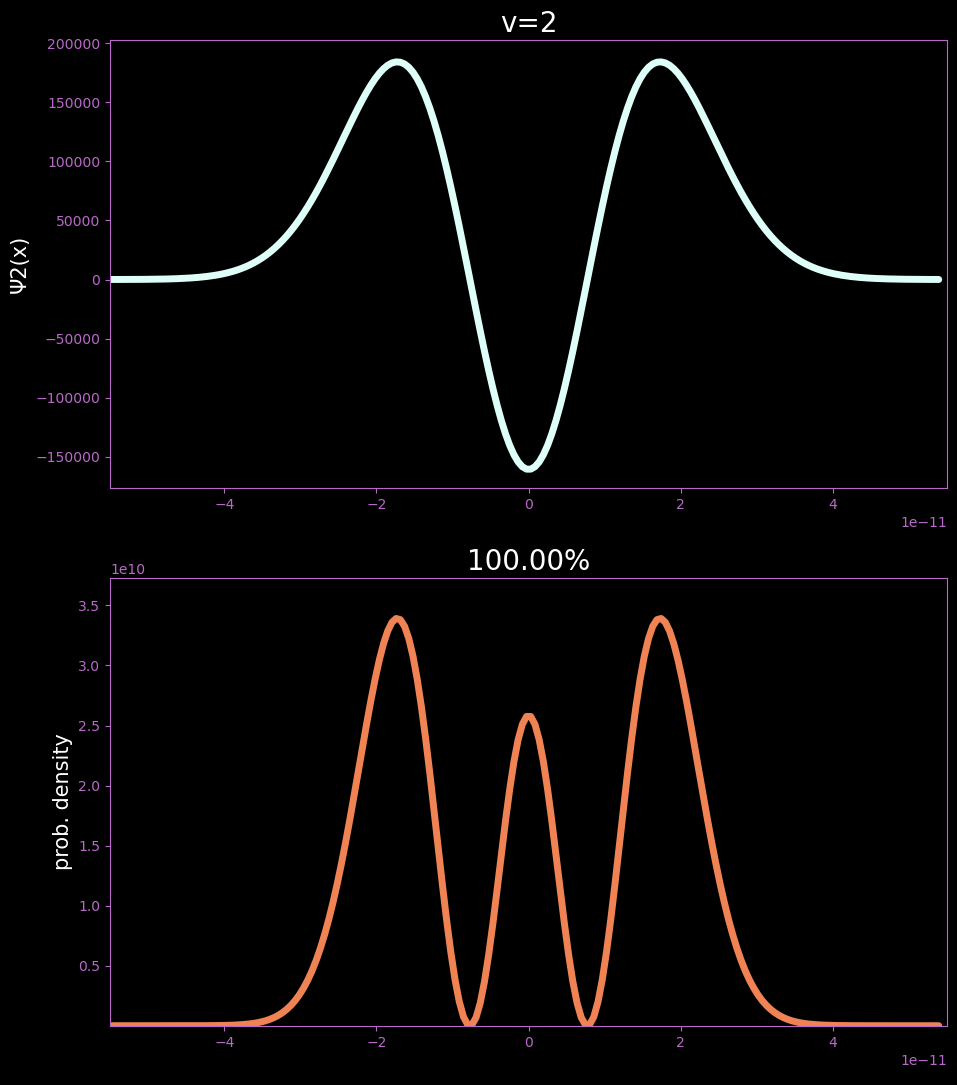

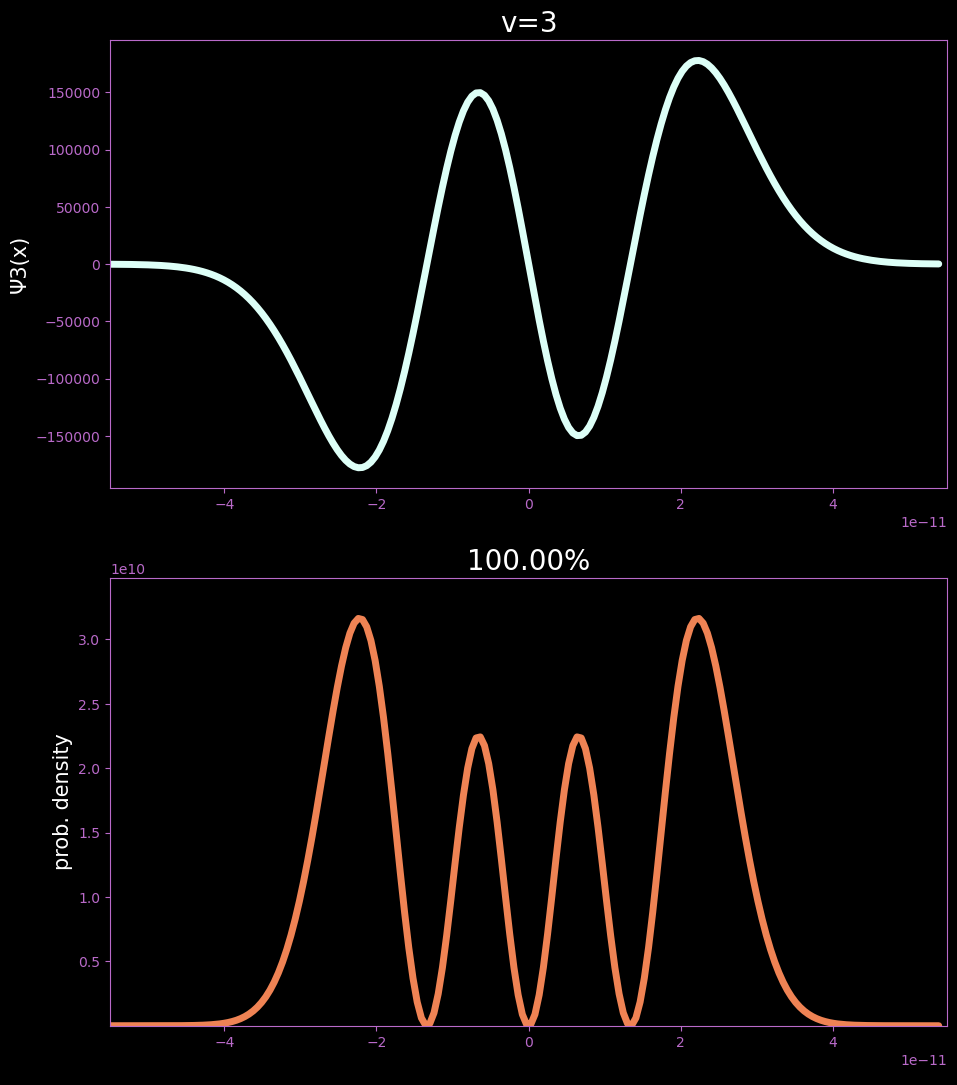

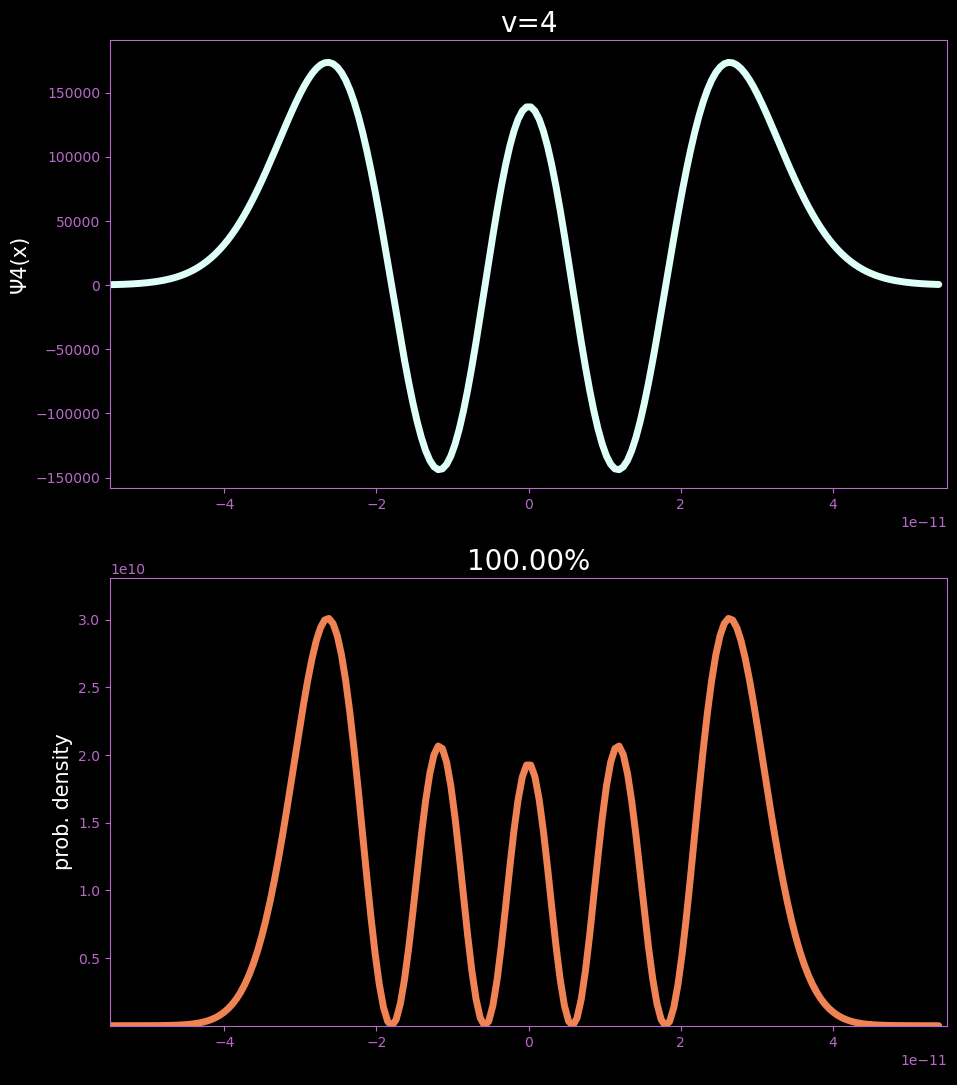

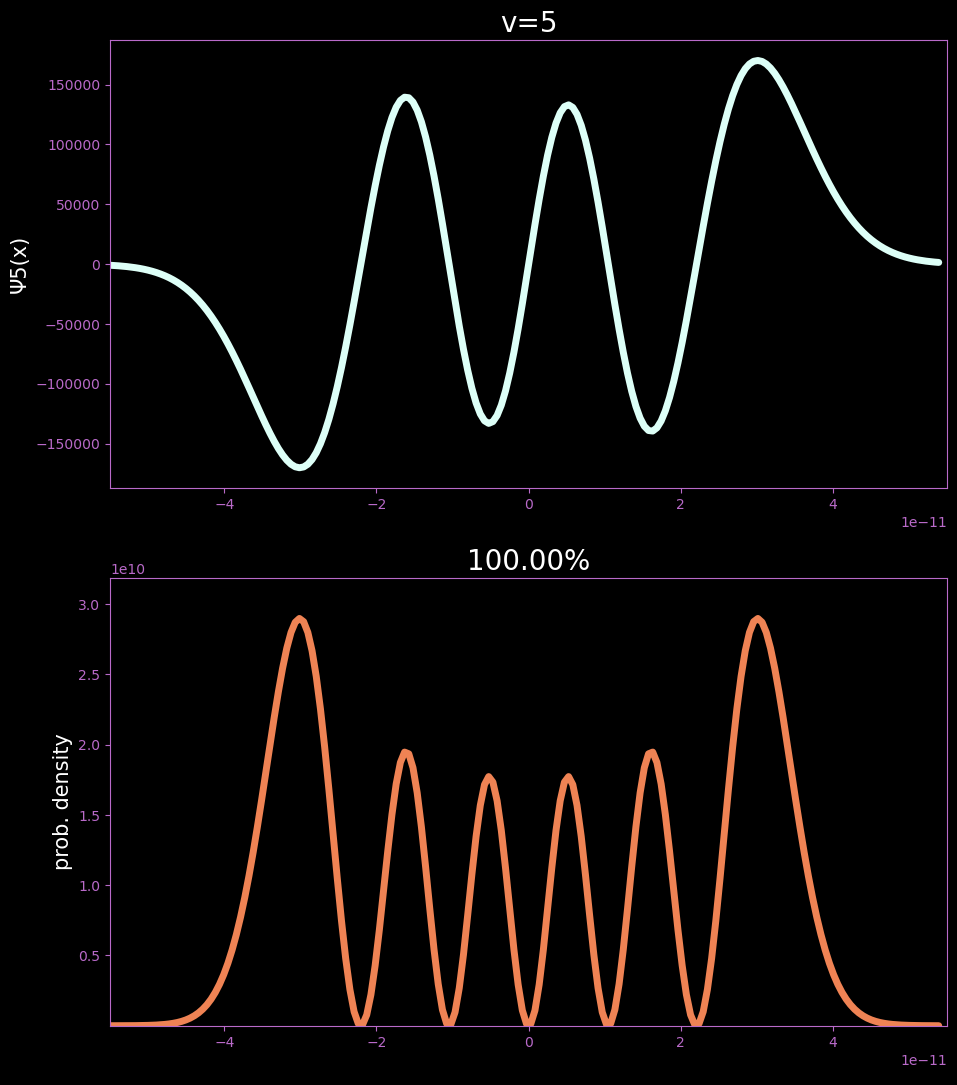

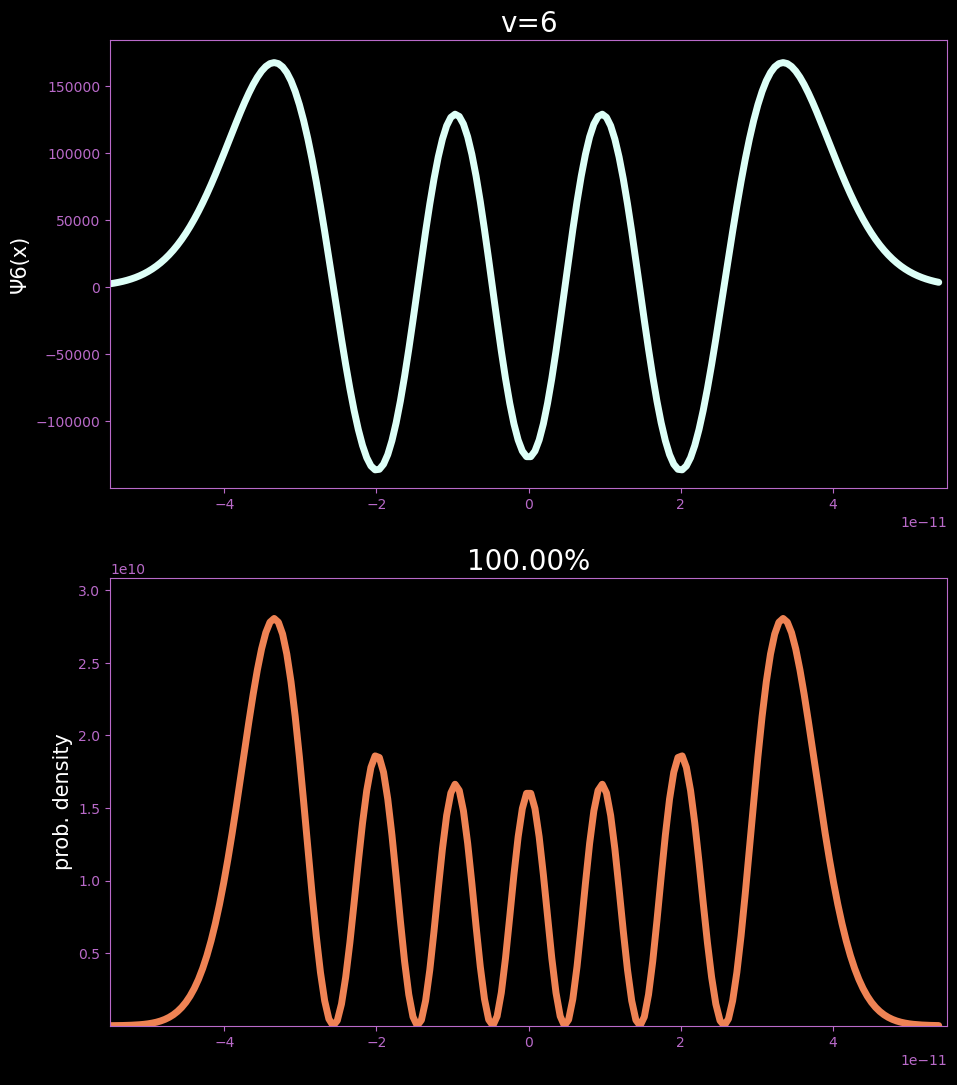

In [4]:
for v in range(qho.max_v() + 1):
    fig, axs = plt.subplots(nrows=2, ncols=1, dpi=dpi, figsize=(width, height))

    for ax in axs:
        ax.set_facecolor(bgcolor)
        fig.set_facecolor(bgcolor)
        ax.tick_params(axis='x', colors=axis_color)
        ax.tick_params(axis='y', colors=axis_color)

    for ax in axs:
        for spine_direction in ["top", "right", "bottom", "left"]:
            ax.spines[spine_direction].set_color(axis_color)

    wavefunction_line = axs[0].plot(wavefunctions[v][0][0], wavefunctions[v][1][0], color=line_color_1, lw=5, solid_capstyle='round')
    prob_density_title = axs[1].set_title('probability=0%', size=20, color=heading_text_color)
    prob_density_line = axs[1].plot(prob_densities[v][0][0], prob_densities[v][1][0], color=line_color_2, lw=5, solid_capstyle='round')

    def init_func():
        axs[0].set_title(f'v={v}', size=20, color=heading_text_color)
        axs[0].set_ylabel(f'Ψ{v}(x)', size=15, color=heading_text_color)
        axs[0].set_xlabel('x', size=15)
        axs[0].set_xlim(x_min, x_max)
        axs[0].set_ylim(min(wavefunctions[v][1])*1.1, max(wavefunctions[v][1])*1.1)
        
        axs[1].set_ylabel(f'prob. density', size=15, color=heading_text_color)
        axs[1].set_xlabel('x', size=15)
        axs[1].set_xlim(x_min, x_max)
        axs[1].set_ylim(min(prob_densities[v][1]), max(prob_densities[v][1])*1.1)

        return wavefunction_line, prob_density_line, prob_density_title

    def update(frame):
        point = frame * 2
        wavefunction_line[0].set_xdata(wavefunctions[v][0][:point])
        wavefunction_line[0].set_ydata(wavefunctions[v][1][:point])
        prob_density_line[0].set_xdata(prob_densities[v][0][:point])
        prob_density_line[0].set_ydata(prob_densities[v][1][:point])
        cumulative_prbability = qho.integrate_prob_density_between_limits(v, min(prob_densities[v][0]), prob_densities[v][0][point])
        prob_density_title.set_text(f'{format(cumulative_prbability*100, ".2f")}%')

        print(f'v={v}, frame={frame}')

        return wavefunction_line[0], prob_density_line[0], prob_density_title

    ani = animation.FuncAnimation(fig=fig, func=update, init_func=init_func, frames=n_frames, interval=33)
    ani.save(filename=os.path.join('output', f'wavefunction_prob_density_{v}.mp4'), writer='ffmpeg')